## Dependencies


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install torch
!pip install torchtext==0.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 28.1 MB/s 
     |████████████████████████████████| 831.4 MB 2.6 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.13.1
    Uninstalling torchtext-0.13.1:
      Successfully uninstalled torchtext-0.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1+cu113 requires torch==1.12.1, but you have torch 1.9.0 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.9.0 whic

In [ ]:
#import libraries
import os
from typing import List
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd

## Data Analysis

In [ ]:
data_df = pd.read_csv('hw1_train-1.csv')
data_df.head()

,ID,textstr,label
0,0,who plays luke on star wars new hope,movie.starring.actor movie.starring.character
1,1,show credits for the godfather,movie.starring.actor
2,2,who was the main actor in the exorcist,movie.starring.actor
3,3,find the female actress from the movie she's t...,movie.starring.actor actor.gender
4,4,who played dory on finding nemo,movie.starring.actor movie.starring.character


In [ ]:
data_df.fillna('none', inplace=True)

In [ ]:
labels = data_df["label"].unique()

uniq_label = set()

for label in labels:
  if isinstance(label, str):
  # if label != "none":
    label = str(label).split()
    [uniq_label.add(i) for i in label]
  else:
    print(label)

uniq_label = list(uniq_label)
print(len(uniq_label))
print(uniq_label)

19
['movie.language', 'movie.music', 'person.date_of_birth', 'movie.gross_revenue', 'gr.amount', 'movie.starring.character', 'movie.produced_by', 'movie.directed_by', 'movie.genre', 'movie.production_companies', 'movie.starring.actor', 'movie.initial_release_date', 'movie.estimated_budget', 'actor.gender', 'movie.country', 'none', 'movie.rating', 'movie.subjects', 'movie.locations']


In [ ]:
print("{")

for i in range(len(uniq_label)):
  print('\t"'+uniq_label[i]+'" : ', i ," ,")

print("}")

{
	"movie.language" :  0  ,
	"movie.music" :  1  ,
	"person.date_of_birth" :  2  ,
	"movie.gross_revenue" :  3  ,
	"gr.amount" :  4  ,
	"movie.starring.character" :  5  ,
	"movie.produced_by" :  6  ,
	"movie.directed_by" :  7  ,
	"movie.genre" :  8  ,
	"movie.production_companies" :  9  ,
	"movie.starring.actor" :  10  ,
	"movie.initial_release_date" :  11  ,
	"movie.estimated_budget" :  12  ,
	"actor.gender" :  13  ,
	"movie.country" :  14  ,
	"none" :  15  ,
	"movie.rating" :  16  ,
	"movie.subjects" :  17  ,
	"movie.locations" :  18  ,
}


In [ ]:
label_dict = {
	"none" : 0,
	"actor.gender" :  1  ,
	"movie.produced_by" :  2  ,
	"movie.gross_revenue" :  3,
	"movie.genre" :  4  ,
	"movie.locations" :  5  ,
	"movie.directed_by" :  6  ,
	"gr.amount" :  7  ,
	"person.date_of_birth" :  8  ,
	"movie.music" :  9  ,
	"movie.country" :  10  ,
	"movie.subjects" :  11  ,
	"movie.estimated_budget" :  12  ,
	"movie.production_companies" :  13  ,
	"movie.starring.character" :  14  ,
	"movie.starring.actor" :  15  ,
	"movie.language" :  16  ,
	"movie.initial_release_date" :  17  ,
	"movie.rating" :  18
              }

In [ ]:
data_df['label_list'] = data_df['label'].map(lambda x: [label_dict.get(a,-1) for a in str(x).split(" ")])
data_df.head()

,ID,textstr,label,label_list
0,0,who plays luke on star wars new hope,movie.starring.actor movie.starring.character,"[15, 14]"
1,1,show credits for the godfather,movie.starring.actor,[15]
2,2,who was the main actor in the exorcist,movie.starring.actor,[15]
3,3,find the female actress from the movie she's t...,movie.starring.actor actor.gender,"[15, 1]"
4,4,who played dory on finding nemo,movie.starring.actor movie.starring.character,"[15, 14]"


15 count: 355
14 count: 22
1 count: 9
8 count: 6
12 count: 79
6 count: 346
9 count: 3
17 count: 189
5 count: 3
2 count: 175
13 count: 93
10 count: 223
11 count: 94
4 count: 129
16 count: 220
0 count: 319
18 count: 211
3 count: 34
7 count: 5


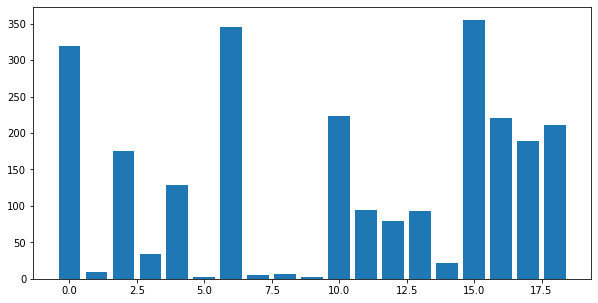

In [ ]:
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt

all_labels = list(chain.from_iterable(data_df['label_list'].values))
c_val = Counter(all_labels)
n_keys = c_val.keys()
max_idx = max(n_keys)
fig, ax1 = plt.subplots(1,1, figsize = (10, 5))
ax1.bar(n_keys, [c_val[k] for k in n_keys])
for k,v in c_val.items():
    print(k, 'count:', v)

In [ ]:
data_df['label_vec'] = data_df['label_list'].map(lambda ck: [int(i in ck) for i in range(max_idx+1)])
data_df.head()

,ID,textstr,label,label_list,label_vec
0,0,who plays luke on star wars new hope,movie.starring.actor movie.starring.character,"[15, 14]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1,1,show credits for the godfather,movie.starring.actor,[15],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,who was the main actor in the exorcist,movie.starring.actor,[15],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,find the female actress from the movie she's t...,movie.starring.actor actor.gender,"[15, 1]","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,who played dory on finding nemo,movie.starring.actor movie.starring.character,"[15, 14]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


## Pre-Processing

In [ ]:
#import libraries
import os
from typing import List
import torchtext.legacy.data as ttd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:
import torch
from torchtext import data

In [ ]:
label_dict = {
	"none" : 0,
	"actor.gender" :  1  ,
	"movie.produced_by" :  2  ,
	"movie.gross_revenue" :  3,
	"movie.genre" :  4  ,
	"movie.locations" :  5  ,
	"movie.directed_by" :  6  ,
	"gr.amount" :  7  ,
	"person.date_of_birth" :  8  ,
	"movie.music" :  9  ,
	"movie.country" :  10  ,
	"movie.subjects" :  11  ,
	"movie.estimated_budget" :  12  ,
	"movie.production_companies" :  13  ,
	"movie.starring.character" :  14  ,
	"movie.starring.actor" :  15  ,
	"movie.language" :  16  ,
	"movie.initial_release_date" :  17  ,
	"movie.rating" :  18
              }

In [ ]:
# hyper-parameters:
lr = 0.01
batch_size = 1
dropout_keep_prob = 0.5
embedding_size = 100
max_document_length = 20  # each sentence has until 20 words
dev_size = 0.8 # split percentage to train\validation data
max_size = 5000 # maximum vocabulary size
seed = 1234
num_classes = 19

In [ ]:
max_idx = 18

def cleanup_text(texts):
    # print(texts)
    cleaned_text = []
    for text in texts:
        # remove punctuation
        text = re.sub('[!#?,.:";]', ' ', text)
        # remove multiple spaces
        text = re.sub(r' +', ' ', text)
        # remove newline
        text = re.sub(r'\n', ' ', text)
        cleaned_text.append(text)
    return cleaned_text

def toTensor(label):
  ck = [0]
  if isinstance(label, str):
    #if label != "none":
    ck = [label_dict.get(a,-1) for a in str(label).split(" ")]
  label_vec = [int(i in ck) for i in range(max_idx+1)]
  return label_vec

In [ ]:
#Ref : https://stackoverflow.com/questions/68083915/why-is-the-result-different-for-same-dataset-in-torchtext-legecy-text-when-i-cha

ID = ttd.Field( sequential=False,
                use_vocab=False)

TEXT = ttd.Field(
    preprocessing=cleanup_text,
    sequential =True,
    batch_first =True,
    include_lengths=True,
    fix_length=max_document_length,
    lower = True,
    tokenize ='spacy',
    pad_first = True,
    # dtype = torch.float
)

LABEL = ttd.Field(preprocessing=toTensor,
                  sequential=False,
                  use_vocab=False,
                  is_target  =True,
                  dtype = torch.float
              )






In [ ]:
dataset = ttd.TabularDataset(
    path = 'hw1_train-1.csv',
    format ='csv',
    skip_header=True,
    fields = [
              ('ID',ID),
              ('textstr',TEXT),
              ('label', LABEL),
    ]
)

In [ ]:
import random
SEED = 1234
MAX_VOCAB_SIZE = 2000
train_dataset, test_dataset = dataset.split( split_ratio=0.8, random_state = random.seed(SEED))
TEXT.build_vocab(train_dataset,
                 max_size = MAX_VOCAB_SIZE, 
                #  vectors = "glove.6B.100d", 
                #  unk_init = torch.Tensor.normal_
                 )
vocab = TEXT.vocab
# vocab.stoi

In [ ]:
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

In [ ]:
LABEL.build_vocab(train_dataset)
vocab_size = len(TEXT.vocab)
vocab_size
vocab = LABEL.vocab
vocab.stoi

defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f0f27c35c50>>,
            {'<unk>': 0, 0: 1, 1: 2})

In [ ]:
BATCH_SIZE = 128

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, test_iterator = ttd.BucketIterator.splits(
    (train_dataset, test_dataset), 
    batch_size = BATCH_SIZE,
    sort_key = lambda x: len(x.textstr),
    sort_within_batch = True,
    device = device)

In [ ]:
for batch in train_iterator:
  text, text_lengths = batch.textstr
  lab = batch.label
  print(lab)
  print(text_lengths)
  print(text.shape)
  break

tensor([[0., 0., 0.,  ..., 0., 1., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6])
torch.Size([128, 20])


## Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class MLP(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, output_dim, dropout, max_document_length, pad):
        super().__init__()

        # embedding and convolution layers
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=pad)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(embed_size*max_document_length, hidden_size3)  # dense layer
        #self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        # self.fc3 = nn.Linear(hidden_size2, hidden_size3)  # dense layer
        self.fc4 = nn.Linear(hidden_size3, hidden_size4)  # dense layer
        self.fc5 = nn.Linear(embed_size, output_dim)  # dense layer

    def forward(self, text, text_lengths):
        # text shape = (batch_size, num_sequences)
        embedded = self.embedding(text)
        # embedded = [batch size, sent_len, emb dim]

        # embedded = embedded.view(embedded.shape[0], -1)  # x = Flatten()(x)
        #embedded = embedded.unsqueeze(1) # fc gets 4 dimension
        # embedded = embedded.permute(1, 0, 2)
        pooled = F.avg_pool2d(embedded, (embedded.shape[1], 1)).squeeze(1)
        # x = self.relu(self.fc1(x))
        # x = self.dropout(x)
        # #x = self.relu(self.fc2(x))
        # #x = self.dropout(x)
        # # x = self.relu(self.fc3(x))
        # # x = self.dropout(x)
        # x = self.relu(self.fc4(x))
        # x = self.dropout(x)
        preds = self.fc5(pooled)
        #preds = F.softmax(preds, 1)
        # preds = torch.sigmoid(preds)
        return preds

hidden_size1 = 100
hidden_size2 = 128
hidden_size3 = 64
hidden_size4 = 32

num_epochs = 100

to_train = True
mlp_model = MLP(vocab_size, embedding_size, hidden_size1, hidden_size2, hidden_size3,  hidden_size4, num_classes, dropout_keep_prob, max_document_length, PAD_IDX)
mlp_model = mlp_model.to(device)

In [ ]:
# pretrained_embeddings = TEXT.vocab.vectors

# mlp_model.embedding.weight.data.copy_(pretrained_embeddings)

In [ ]:
# UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

# mlp_model.embedding.weight.data[UNK_IDX] = torch.zeros(100)
# mlp_model.embedding.weight.data[PAD_IDX] = torch.zeros(100)

## Train

In [ ]:
import torch
from torch.autograd import Variable
from torchtext import data
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

def accuracy(probs, target):
  
  # print(target.size())
  rounded_preds = torch.round(torch.sigmoid(probs))
  corrects = (rounded_preds == target).float()
  # print(corrects.sum(0), corrects.sum(1), corrects.sum(), target.sum())
  accuracy = corrects.sum() / (target.size(0)*target.size(1))#float(target.size(0))
  # print(corrects.sum(), len(target), target.size())
  return accuracy

def train(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    for batch in iterator:
        optimizer.zero_grad()
        # retrieve text and no. of words
        text, text_lengths = batch.textstr

        predictions = model(text, text_lengths).squeeze(1)

        loss = criterion(predictions, batch.label)
        
        acc = accuracy(predictions, batch.label)

        # perform backpropagation
        loss.backward()

        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():
        for batch in iterator:
            text, text_lengths = batch.textstr

            predictions = model(text, text_lengths).squeeze(1)
            
            loss = criterion(predictions, batch.label)
            #f1 = f1_score(batch.label, predictions, average=None)

            acc = accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


def run_train(epochs, model, train_iterator, valid_iterator, optimizer, criterion, model_type):
    best_valid_loss = float('inf')

    # To accumulate training and testing loss
    train_losses = []
    test_losses = []

    # To accumulate training and testing accuracies
    train_accuracy = []
    test_accuracy = []

    for epoch in range(epochs):

        # train the model
        train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
        train_losses.append(train_loss)
        train_accuracy.append(train_acc)


        # evaluate the model
        valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
        test_losses.append(valid_loss)
        test_accuracy.append(valid_acc)

        # save the best model
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), 'saved_weights'+'_'+model_type+'.pt')
        print(f'\tEpochs: {epoch}/{epochs}')
        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc * 100:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc * 100:.2f}%')
        #print(f1score)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

    # Plot loss values over the epochs
    ax1 = ax[0]
    ax1.set_title("Loss")
    ax1.plot(train_losses, color="red", label="Train Loss")
    ax1.plot(test_losses, color="green", label="Test Loss")
    ax1.legend()

    # Plot accuracies over the epochs
    ax2 = ax[1]
    ax2.set_title("Accuracy")
    ax2.plot(train_accuracy, color="red", label="Train Accuracy")
    ax2.plot(test_accuracy, color="green", label="Test Accuracy")
    ax2.legend()

    plt.show()

In [ ]:
#Adam
optimizer = torch.optim.Adam(mlp_model.parameters(), lr=lr)
#SGD
# optimizer = torch.optim.SGD(mlp_model.parameters(), lr=lr)

loss_func = nn.BCEWithLogitsLoss()
run_train(num_epochs, mlp_model, train_iterator, test_iterator, optimizer, loss_func, "MLP")

#torch.optim.lr_scheduler.StepLR(optimizer, step_size = 30, gamma=0.1, last_epoch=- 1, verbose=False)


## Load Model

In [ ]:
 mlp_model.load_state_dict(torch.load('saved_weights_MLP.pt'))

<All keys matched successfully>

## Inference

In [ ]:
label_dict = {
            0:"none" ,
            1:"actor.gender" ,
            2:"movie.produced_by" ,
            3:"movie.gross_revenue" ,
            4:"movie.genre" ,
            5:"movie.locations",
            6:"movie.directed_by"  ,
            7:"gr.amount" ,
            8:"person.date_of_birth"   ,
            9:"movie.music" ,
            10:"movie.country" ,
            11:"movie.subjects" ,
            12:"movie.estimated_budget"  ,
            13:"movie.production_companies"   ,
            14:"movie.starring.character"  ,
            15:"movie.starring.actor" ,
            16:"movie.language"  ,
            17:"movie.initial_release_date"  ,
            18:"movie.rating"  
                }

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

def predict_relations(model, sentence):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    indexed = [1] * (max_document_length - len(indexed)) + indexed
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(0)
    length_tensor = torch.LongTensor(length)
    pred = model(tensor, length_tensor)
    prediction = torch.round(torch.sigmoid(pred)).int().squeeze()
    # print(prediction)
    # print((prediction==1).nonzero(as_tuple=True))
    pred_strings = [label_dict.get(i.item()) for i in (prediction==1).nonzero(as_tuple=False)]
    return pred_strings

In [ ]:
predict_relations(mlp_model, "show credits for the godfather")

['movie.starring.actor']

In [ ]:
predict_relations(mlp_model, "who plays luke on star wars new hope")

['movie.starring.character', 'movie.starring.actor']

In [ ]:
predict_relations(mlp_model, "who is in vulguria")

['movie.starring.actor']

## Submission

In [ ]:
test_df = pd.read_csv('hw1_test-2.csv')
test_df.head()

,ID,UTTERANCES
0,0,star of thor
1,1,who is in the movie the campaign
2,2,list the cast of the movie the campaign
3,3,who was in twilight
4,4,who is in vulguria


In [ ]:
for i, row in test_df.iterrows():
  predictions = predict_relations(mlp_model, test_df.at[i,'UTTERANCES'])
  relations = ""
  for pred in predictions:
    relations += pred + " "
    
  test_df.at[i,'CORE RELATIONS'] = relations

test_df.head()

,ID,UTTERANCES,CORE RELATIONS
0,0,star of thor,movie.starring.actor
1,1,who is in the movie the campaign,none
2,2,list the cast of the movie the campaign,movie.starring.actor
3,3,who was in twilight,movie.starring.actor
4,4,who is in vulguria,movie.starring.actor


In [ ]:
test_df = test_df.drop('UTTERANCES', axis=1)
test_df.head()

,ID,CORE RELATIONS
0,0,movie.starring.actor
1,1,none
2,2,movie.starring.actor
3,3,movie.starring.actor
4,4,movie.starring.actor


In [ ]:
test_df.to_csv('submission.csv', index=False)